In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [3]:
# membaca file csv studentinfo.csv didalam folder anonymisedData
studentInfo = pd.read_csv('anonymisedData/studentInfo.csv')

## Exploratory Data Analysis

In [4]:
# menampilkan 5 data teratas dari studentinfo.csv
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
# menghitung jumlah data dan baris
studentInfo.shape

(32593, 12)

In [6]:
# mengecek apabila ada data null/kosong dan ditotal
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [7]:
# mengecek apabila ada data duplikat dan ditotal
studentInfo.duplicated().sum()

0

In [8]:
# menampilkan deskripsi setiap fitur beserta tipe datanya
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


### Distribusi Gender pada Students

<Axes: xlabel='gender', ylabel='count'>

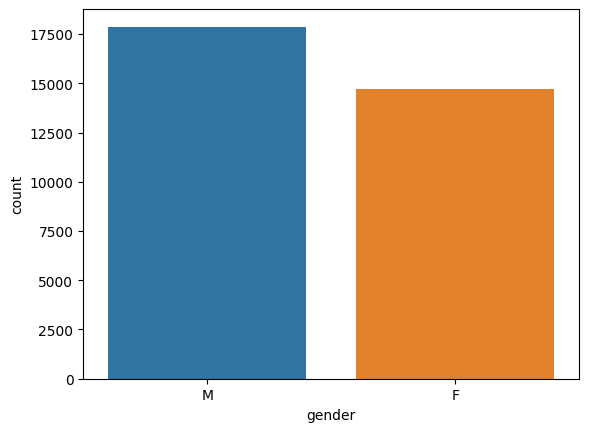

In [9]:
#Membuat Visualisasi distribusi gender menggunakan plot
sns.countplot(data=studentInfo, x='gender')

In [10]:
# menampilkan nilai-nilai unik dalam kolom atau array tertentu.
studentInfo.gender.unique

<bound method Series.unique of 0        M
1        F
2        F
3        F
4        F
        ..
32588    F
32589    F
32590    F
32591    F
32592    F
Name: gender, Length: 32593, dtype: object>

### Age Distribution of Students

<Axes: xlabel='age_band'>

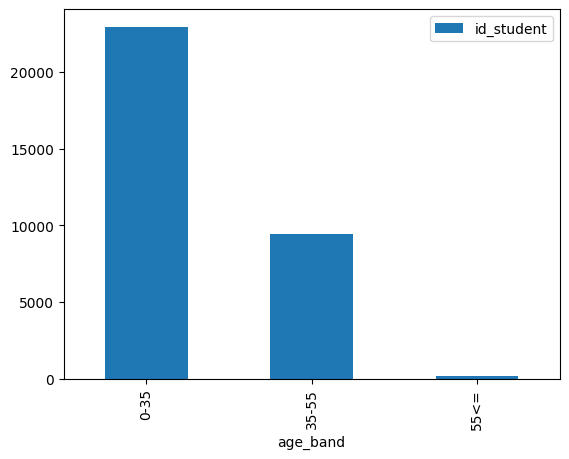

In [11]:
#Distribusi Umur
studentInfo[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar()

### Age vs Geographic Region

<Axes: ylabel='region'>

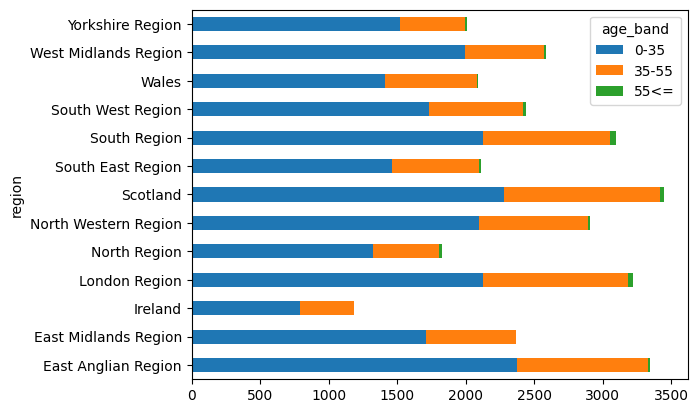

In [12]:
# Statistik Umur vs Region
pd.crosstab(studentInfo.region, studentInfo.age_band).plot.barh(stacked = True)

### Student previous attempt distribution

Boxplot menyediakan banyak statistik tentang variabel kontinu, semua kuartil, outlier

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'East Anglian Region'),
  Text(2, 0, 'East Midlands Region'),
  Text(3, 0, 'Ireland'),
  Text(4, 0, 'London Region'),
  Text(5, 0, 'North Region'),
  Text(6, 0, 'North Western Region'),
  Text(7, 0, 'Scotland'),
  Text(8, 0, 'South East Region'),
  Text(9, 0, 'South Region'),
  Text(10, 0, 'South West Region'),
  Text(11, 0, 'Wales'),
  Text(12, 0, 'West Midlands Region'),
  Text(13, 0, 'Yorkshire Region')])

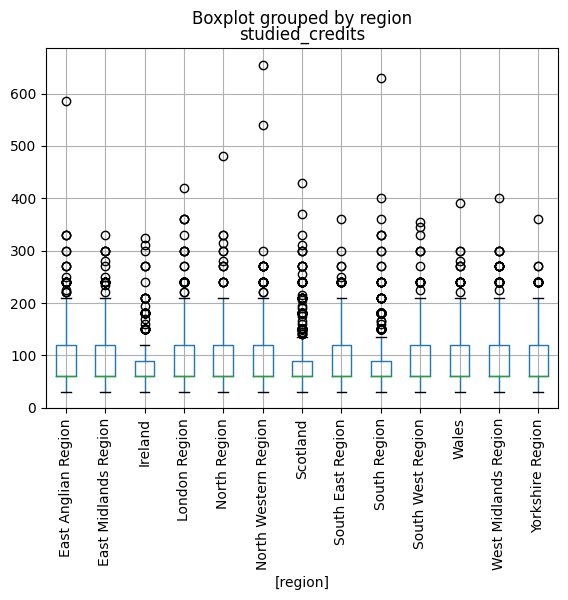

In [22]:
#  boxplot akan menggambarkan distribusi data dalam kolom-kolom yang tersisa
studentInfo.drop(['id_student', 'num_of_prev_attempts'], axis=1).boxplot(by = 'region')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'East Anglian Region'),
  Text(1, 0, 'Scotland'),
  Text(2, 0, 'North Western Region'),
  Text(3, 0, 'South East Region'),
  Text(4, 0, 'West Midlands Region'),
  Text(5, 0, 'Wales'),
  Text(6, 0, 'North Region'),
  Text(7, 0, 'South Region'),
  Text(8, 0, 'Ireland'),
  Text(9, 0, 'South West Region'),
  Text(10, 0, 'East Midlands Region'),
  Text(11, 0, 'Yorkshire Region'),
  Text(12, 0, 'London Region')])

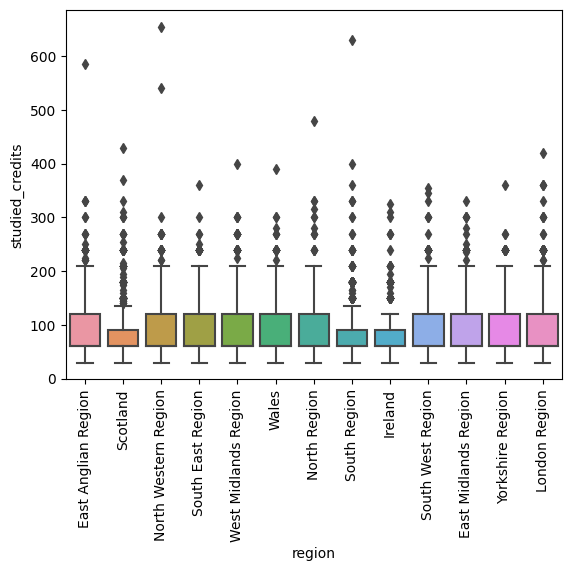

In [14]:
sns.boxplot(x = 'region', y = 'studied_credits', data=studentInfo)
plt.xticks(rotation = 90)

### No of students enrolled with the platform

In [15]:

studentInfo.id_student.nunique()

28785

## Data Engineering

Here we need to link the tables to build out Master Dataset. Once it is ready, we start Feature Engineering.

In [16]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [17]:
# metode yang digunakan untuk menghitung jumlah nilai unik dalam suatu kolom atau rangkaian data
studentInfo.id_student.nunique()

28785

In [18]:
# menghitung median dari kolom 'num_of_prev_attempts' dan 'studied_credits' berdasarkan kelompok 'id_student' dalam DataFrame studentInfo. Kemudian, 
# hasil perhitungan tersebut disimpan dalam DataFrame student_performance,
student_performance = studentInfo[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()
student_performance = student_performance.reset_index()
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            28785 non-null  int64  
 1   num_of_prev_attempts  28785 non-null  float64
 2   studied_credits       28785 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 674.8 KB


In [19]:
# menciptakan DataFrame baru dengan kolom-kolom yang tertera
student_profile = studentInfo[['id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band']].drop_duplicates()
student_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28857 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         28857 non-null  int64 
 1   gender             28857 non-null  object
 2   region             28857 non-null  object
 3   highest_education  28857 non-null  object
 4   imd_band           27877 non-null  object
 5   age_band           28857 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


<Axes: >

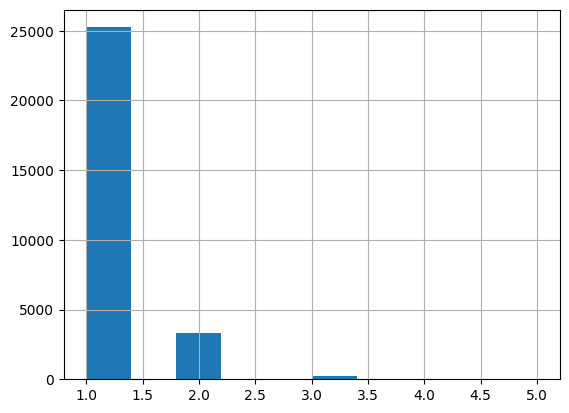

In [20]:
# menghitung jumlah entri (jumlah kemunculan) dari setiap nilai dalam kolom 'age_band' dalam DataFrame studentInfo untuk setiap siswa ('id_student')
student_ages = studentInfo[['id_student', 'age_band']].groupby(['id_student']).count()
student_ages = student_ages.reset_index()
student_ages.age_band.hist()

In [21]:
# student_module_lengths = studentInfo.merge(courses, on = ['code_module', 'code_presentation'], how='left')
# student_module_lengths = student_module_lengths[['id_student', 
#                         'module_presentation_length']].groupby('id_student').median()
# student_module_lengths = student_module_lengths.reset_index()
# student_module_lengths.info()